# Домашнее задание 2. Часть 2

##### Трепаленко Александра, бкл182 при поддержке Кати Такташевой

### Перевод разбора в датафрейм

Импоритруем все необходимые модули. Собираем список из разобранных при помощи pymorphy слов и их характеристик. На основе этих данных задаем датафрейм.

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd


morph = MorphAnalyzer()
data = []

with open('smorodin.txt', encoding='utf-8-sig') as f:
    text = f.read()
    
PUNCT = list(""".,…;:!?@#$%^&*№()_—=+|[]{}/\"<>`~±§«»""") + ['- ', ' -', ' - ']
for sign in PUNCT:
    text = text.replace(sign, '')
words = word_tokenize(text)
for word in words:
    ana = morph.parse(word)
    word_ana = {}
    word_ana['word']=ana[0].word
    word_ana['lex']=ana[0].normal_form
    word_ana['POS']=ana[0].tag.POS
    word_ana['animcay']=ana[0].tag.animacy
    word_ana['aspect']=ana[0].tag.aspect
    word_ana['case']=ana[0].tag.case
    word_ana['gender']=ana[0].tag.gender
    word_ana['involvement']=ana[0].tag.involvement
    word_ana['mood']=ana[0].tag.mood
    word_ana['number']=ana[0].tag.number
    word_ana['person']=ana[0].tag.person
    word_ana['tense']=ana[0].tag.tense
    word_ana['transitivity']=ana[0].tag.transitivity
    word_ana['voice']=ana[0].tag.voice
    data.append(word_ana)
    
df = pd.DataFrame(data).fillna('')

#### Сам датафрейм

In [3]:
df

,POS,animcay,aspect,case,gender,involvement,lex,mood,number,person,tense,transitivity,voice,word
0,NOUN,anim,,nomn,femn,,агата,,sing,,,,,агата
1,NOUN,anim,,nomn,,,кристи,,sing,,,,,кристи
2,ADJF,,,nomn,femn,,чёрный,,sing,,,,,чёрная
3,NOUN,inan,,nomn,femn,,смородина,,sing,,,,,смородина
4,NOUN,anim,,voct,femn,,эркюля,,sing,,,,,эркюль
5,ADJS,,,,neut,,пуарый,,sing,,,,,пуаро
6,VERB,,impf,,masc,,обедать,indc,sing,,past,intr,,обедал
7,PREP,,,,,,с,,,,,,,со
8,ADJF,,,datv,,,свой,,plur,,,,,своим
9,NOUN,anim,,ablt,masc,,друг,,sing,,,,,другом


### Графики с семинара
#### График 1
Берем данные по тегу 'gender'. Создаем столбчатую диаграмму, отражающую количество слов каждого из встречающихся родов.

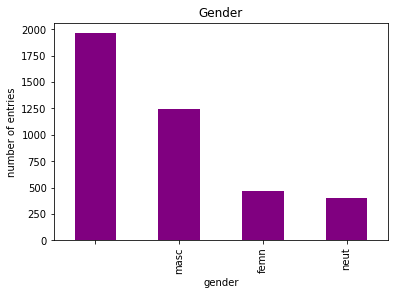

In [4]:
df['gender'].value_counts().plot.bar(color='purple');
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries');

#### График 2
Используя те же данные строим круговую диаграмму.

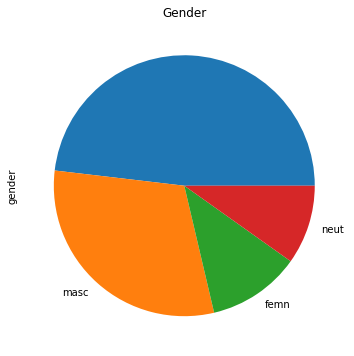

In [5]:
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot(kind='pie');
plt.title('Gender');

#### График 3
Устанавливаем модуль WordCloud. С его помощью создаем облако самых частотных слов.

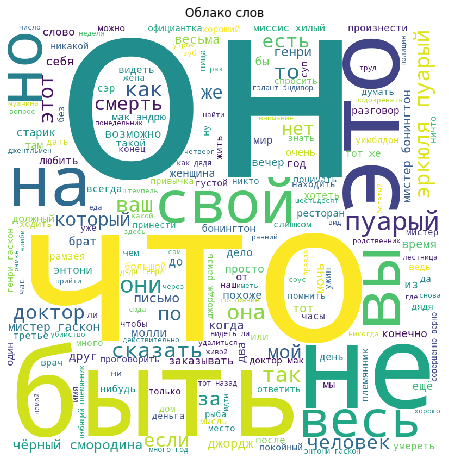

In [6]:
#! pip install wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords


text = ' '.join(df['lex'])

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов')
plt.show()

### Мои графики
Я использую два типа графиков, позволяющих посмотреть распределение слов в тексте по числу, для того, чтобы понять какой из них в таком случае удобнее. Круговая диаграмма полезнее, если необходимо сопоставить количество слов каждой категории относительно общего числа словоупотреблений. Столбчатая диаграмма позволяет получить представление о более точном количестве и сопоставить конкретные категории между собой.

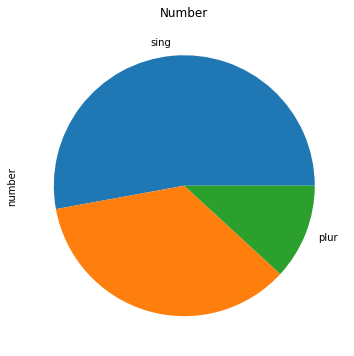

In [7]:
plt.figure(figsize=(6, 6))
df['number'].value_counts().plot(kind='pie');
plt.title('Number');

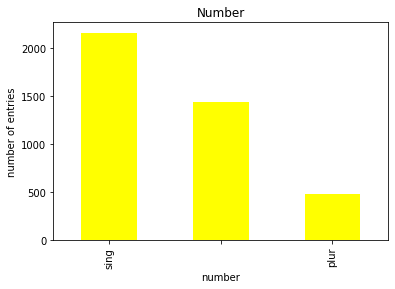

In [8]:
df['number'].value_counts().plot.bar(color='yellow'); # барплот сразу из датафрейма
plt.title('Number')
plt.xlabel('number')
plt.ylabel('number of entries');

### График по героям книги
Задаем список из имен трех персонажей, упоминающихся в книге. При помощи nltk dispersion plot создаем график, отражающий колчество упоминаний имени героев.

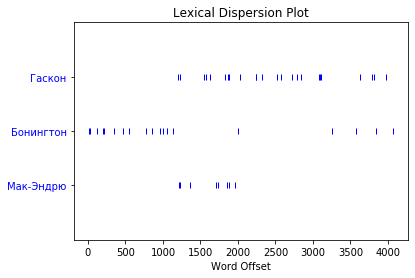

In [9]:
words_2 = ['Гаскон', 'Бонингтон', 'Мак-Эндрю']
nltk.draw.dispersion.dispersion_plot(df['lex'], words_2, ignore_case=True)